# ASSESSMENT - 2 

### Objective: 
To build a machine learning model capable of predicting the power system Load_Type (Light_Load, Medium_Load, Maximum_Load) using historical energy consumption data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("data/load_data.csv")

df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (35041, 9)


In [6]:
print("\nData Info:\n")
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [7]:
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,33482.000000,34165.000000,33885.000000,34586.000000,34691.000000,33570.000000,34586.000000
mean,30.873061,14.704573,4.386097,0.012947,90.740871,94.926552,48013.664032
std,41.415015,20.342721,9.090181,0.019726,39.745395,49.826872,34046.492333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.310000,2.340000,0.000000,0.000000,66.295000,99.800000,22500.000000
50%,5.290000,5.180000,0.000000,0.000000,90.080000,100.000000,45000.000000
75%,53.560000,23.510000,2.298558,0.020000,100.000000,100.000000,68400.000000
max,435.019069,262.630718,78.809000,0.188166,299.996814,299.969494,248821.810465


In [8]:
print("\nMissing Values:\n")
df.isnull().sum()


Missing Values:



Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

### Handling Missing Values

In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)

### Feature Engineering

In [12]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d-%m-%Y %H:%M')

df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour

df.sort_values('Date_Time', inplace=True)

# EDA

### 1. Target Distribution

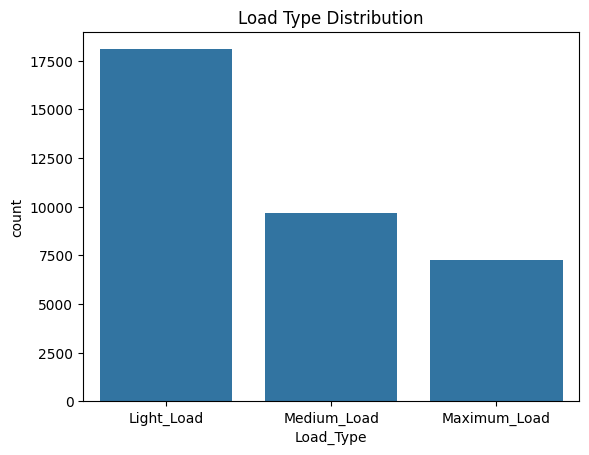

Load_Type
Light_Load      51.576724
Medium_Load     27.670443
Maximum_Load    20.752832
Name: proportion, dtype: float64


In [13]:
sns.countplot(x='Load_Type', data=df)
plt.title("Load Type Distribution")
plt.show()

print(df['Load_Type'].value_counts(normalize=True)*100)

### Feature Distributions

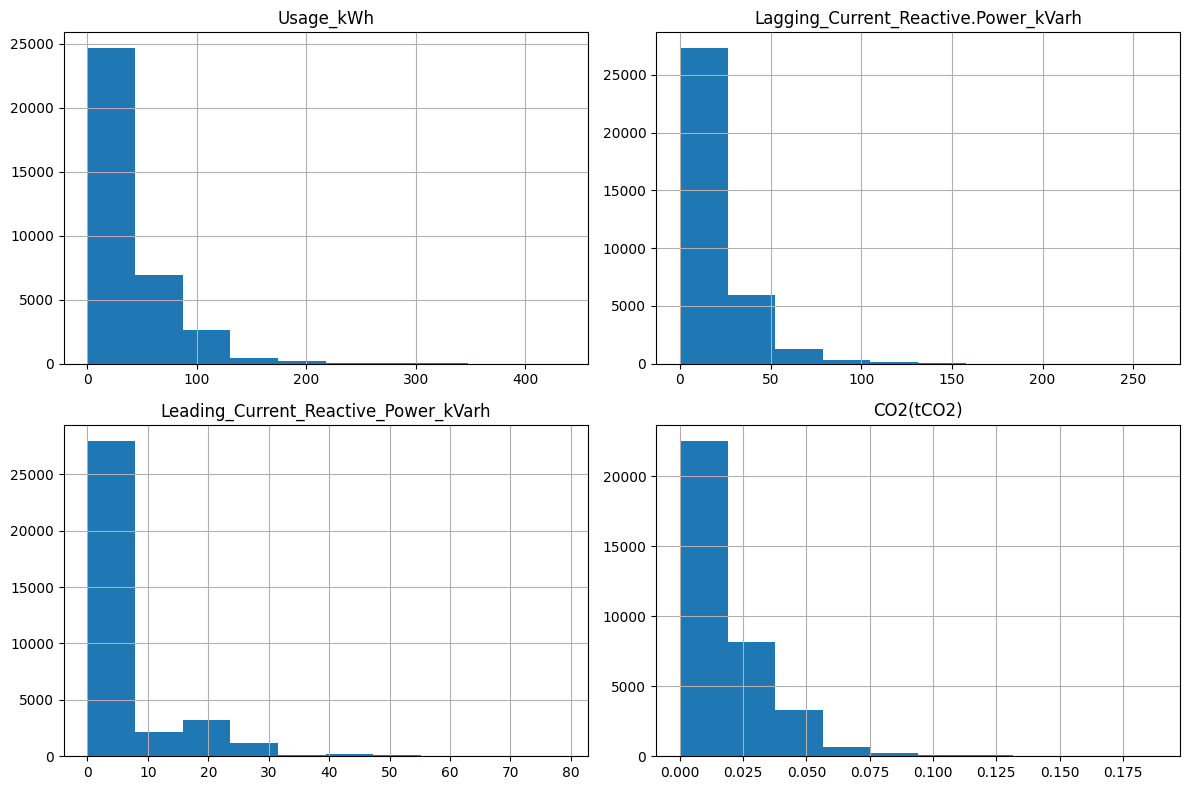

In [14]:
df[['Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)']].hist(figsize=(12,8))

plt.tight_layout()
plt.show()

### Correlation Heatmap

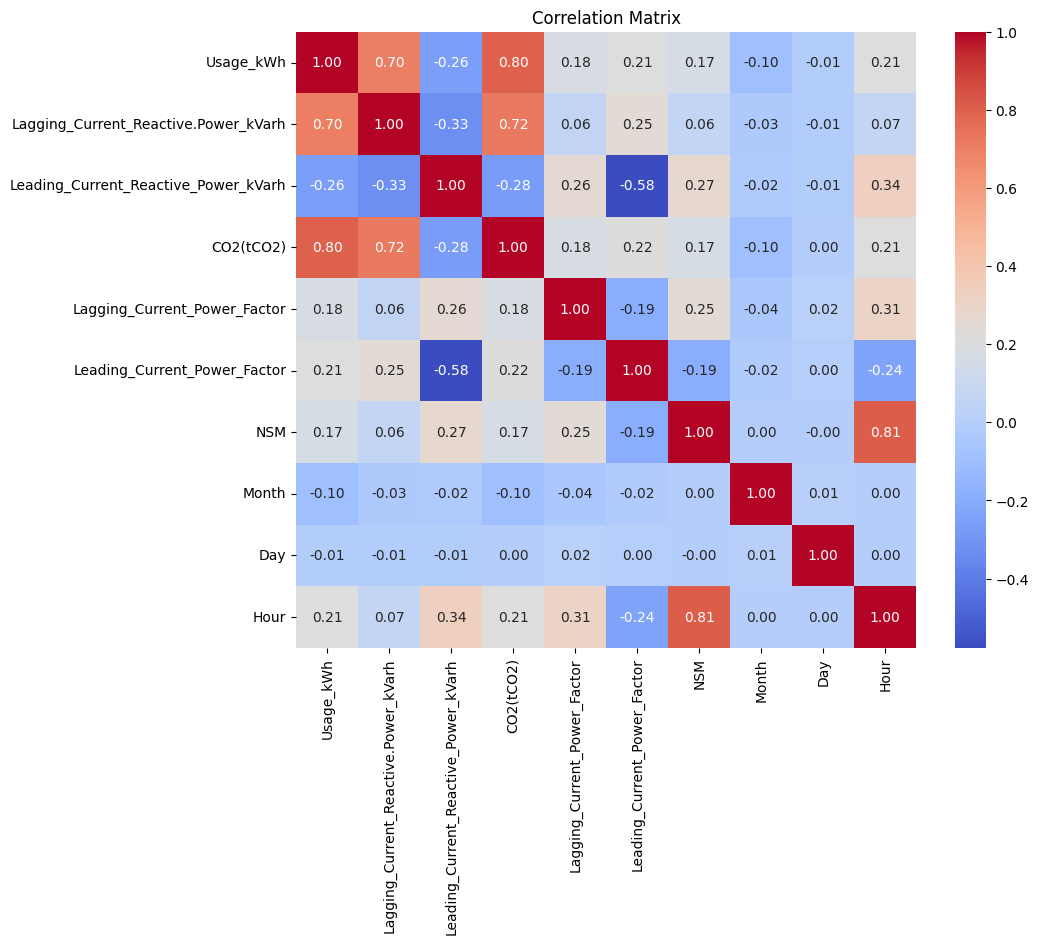

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Usage vs Load Type

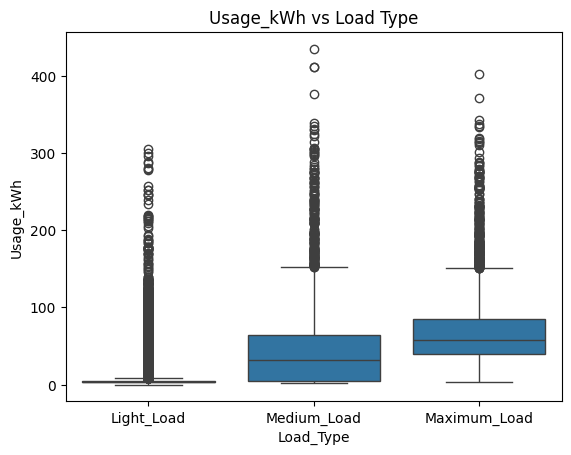

In [16]:
sns.boxplot(x='Load_Type', y='Usage_kWh', data=df)
plt.title("Usage_kWh vs Load Type")
plt.show()

### Data Preparation

In [17]:
le = LabelEncoder()
df['Load_Type'] = le.fit_transform(df['Load_Type'])

last_month = df['Month'].max()

train_df = df[df['Month'] != last_month]
test_df  = df[df['Month'] == last_month]

X_train = train_df.drop(['Load_Type', 'Date_Time'], axis=1)
y_train = train_df['Load_Type']

X_test = test_df.drop(['Load_Type', 'Date_Time'], axis=1)
y_test = test_df['Load_Type']

### Feature Scaling

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.598925092374874


In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.700369499496137


In [20]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.9297950957339604


### Model Evaluation

In [24]:
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, rf_pred, target_names=le.classes_))


Random Forest Classification Report:

              precision    recall  f1-score   support

  Light_Load       0.97      0.92      0.95      1745
Maximum_Load       0.89      0.89      0.89       528
 Medium_Load       0.87      0.98      0.92       704

    accuracy                           0.93      2977
   macro avg       0.91      0.93      0.92      2977
weighted avg       0.93      0.93      0.93      2977



In [25]:
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))


Confusion Matrix:

[[1607   55   83]
 [  36  468   24]
 [   9    2  693]]


The confusion matrix indicates minimal misclassification across classes, with particularly strong recall for Medium_Load (0.98) and high precision for Light_Load (0.97).

### Feature Importance

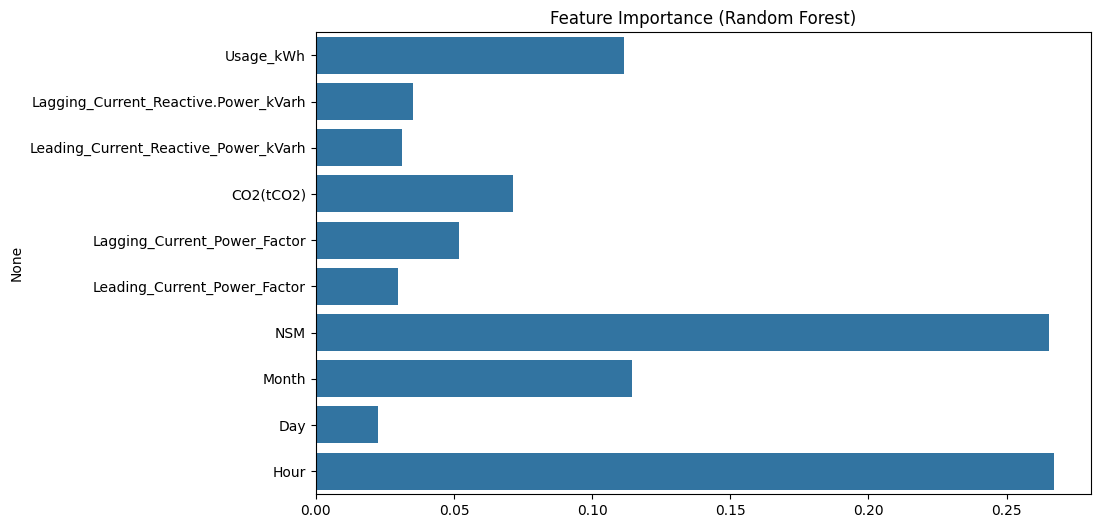

In [22]:
importances = rf.feature_importances_
feature_names = train_df.drop(['Load_Type','Date_Time'], axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()

Feature importance analysis revealed that Hour and NSM (Number of Seconds from Midnight) were the most influential predictors, followed by Month and Usage_kWh. This suggests that temporal patterns play a critical role in determining load type, alongside energy consumption metrics.